## **Environment Setup**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')

## **Load Dataset**

In [ ]:
raw_df = pd.read_excel('/content/drive/MyDrive/Data/raw_data.xlsx')
raw_df

,iso_code,location,date,Week number,Year,Unique,total_cases,new_cases,total_vaccinations,people_vaccinated,people_fully_vaccinated,stringency_index,population_density,aged_65_older,aged_70_older,human_development_index,population
0,AUS,Australia,2020-01-03,1,2020,AUS12020,NaN,0.0,NaN,NaN,NaN,0.0,3.202,15.504,10.129,0.944,26177410
1,AUS,Australia,2020-01-04,1,2020,AUS12020,NaN,0.0,NaN,NaN,NaN,0.0,3.202,15.504,10.129,0.944,26177410
2,AUS,Australia,2020-01-05,2,2020,AUS22020,NaN,0.0,NaN,NaN,NaN,0.0,3.202,15.504,10.129,0.944,26177410
3,AUS,Australia,2020-01-06,2,2020,AUS22020,NaN,0.0,NaN,NaN,NaN,0.0,3.202,15.504,10.129,0.944,26177410
4,AUS,Australia,2020-01-07,2,2020,AUS22020,NaN,0.0,NaN,NaN,NaN,0.0,3.202,15.504,10.129,0.944,26177410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40059,USA,United States,2023-06-03,22,2023,USA222023,103436829.0,0.0,NaN,NaN,NaN,NaN,35.608,15.413,9.732,0.926,338289856
40060,USA,United States,2023-06-04,23,2023,USA232023,103436829.0,0.0,NaN,NaN,NaN,NaN,35.608,15.413,9.732,0.926,338289856
40061,USA,United States,2023-06-05,23,2023,USA232023,103436829.0,0.0,NaN,NaN,NaN,NaN,35.608,15.413,9.732,0.926,338289856
40062,USA,United States,2023-06-06,23,2023,USA232023,103436829.0,0.0,NaN,NaN,NaN,NaN,35.608,15.413,9.732,0.926,338289856


In [ ]:
mort_data = pd.read_csv('/content/drive/MyDrive/Data/stmf.csv')
mort_data

,CountryCode,iso_code,Year,Week,Unique,RTotal
0,AUS,AUS,2017,1,AUS12017,0.006124
1,AUS,AUS,2017,2,AUS22017,0.006128
2,AUS,AUS,2017,3,AUS32017,0.005935
3,AUS,AUS,2017,4,AUS42017,0.006107
4,AUS,AUS,2017,5,AUS52017,0.005804
...,...,...,...,...,...,...
11394,USA,USA,2023,16,USA162023,0.009054
11395,USA,USA,2023,17,USA172023,0.008927
11396,USA,USA,2023,18,USA182023,0.008921
11397,USA,USA,2023,19,USA192023,0.008836


## **Data Cleaning**

In [ ]:
raw_df.fillna(0,inplace = True)

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40064 entries, 0 to 40063
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   iso_code                 40064 non-null  object        
 1   location                 40064 non-null  object        
 2   date                     40064 non-null  datetime64[ns]
 3   Week number              40064 non-null  int64         
 4   Year                     40064 non-null  int64         
 5   Unique                   40064 non-null  object        
 6   total_cases              40064 non-null  float64       
 7   new_cases                40064 non-null  float64       
 8   total_vaccinations       40064 non-null  float64       
 9   people_vaccinated        40064 non-null  float64       
 10  people_fully_vaccinated  40064 non-null  float64       
 11  stringency_index         40064 non-null  float64       
 12  population_density       40064 n

In [ ]:
raw_df = raw_df.astype({'new_cases' : 'int', 'total_cases' : 'int', 'total_vaccinations' : 'int', 'people_fully_vaccinated' : 'int'})

In [ ]:
df1 = mort_data[mort_data['Year'] == 2023].reset_index()
df1 = df1[['iso_code','Week', 'RTotal']]
df1

,iso_code,Week,RTotal
0,AUS,1,0.006958
1,AUS,2,0.006548
2,AUS,3,0.006618
3,AUS,4,0.006402
4,AUS,5,0.006690
...,...,...,...
752,USA,16,0.009054
753,USA,17,0.008927
754,USA,18,0.008921
755,USA,19,0.008836


In [ ]:
df2 = mort_data[mort_data['Year']<2020].groupby(['iso_code','Week']).agg({'RTotal': 'mean'}).reset_index()
df2

,iso_code,Week,RTotal
0,AUS,1,0.006028
1,AUS,2,0.006057
2,AUS,3,0.005978
3,AUS,4,0.006060
4,AUS,5,0.005916
...,...,...,...
1659,USA,48,0.008798
1660,USA,49,0.008987
1661,USA,50,0.009125
1662,USA,51,0.009237


In [ ]:
excess_mort_23 = pd.merge(df1, df2, on=['iso_code','Week'])
excess_mort_23['Mortality Rate'] = (excess_mort_23['RTotal_x']/excess_mort_23['RTotal_y'])-1
excess_mort_23

,iso_code,Week,RTotal_x,RTotal_y,Mortality Rate
0,AUS,1,0.006958,0.006028,0.154369
1,AUS,2,0.006548,0.006057,0.081084
2,AUS,3,0.006618,0.005978,0.107106
3,AUS,4,0.006402,0.006060,0.056459
4,AUS,5,0.006690,0.005916,0.130940
...,...,...,...,...,...
752,USA,16,0.009054,0.008599,0.052959
753,USA,17,0.008927,0.008549,0.044236
754,USA,18,0.008921,0.008535,0.045135
755,USA,19,0.008836,0.008384,0.053954


## **Exploratory Analysis**

#### **Data Manipulation**

In [ ]:
mortality_rate_23 = excess_mort_23.groupby('iso_code').mean()['Mortality Rate'].reset_index()
mortality_rate_23['Mortality Rate'] = round(mortality_rate_23['Mortality Rate']*100, 2)
mortality_rate_23

,iso_code,Mortality Rate
0,AUS,9.13
1,AUT,4.47
2,BEL,-2.24
3,BGR,-6.84
4,CAN,0.05
5,CHL,14.97
6,CZE,-1.89
7,DEU,6.49
8,DNK,1.89
9,ESP,1.26


In [ ]:
vaccinations = raw_df.groupby('iso_code').agg({'people_fully_vaccinated' : 'max', 'population' : 'max'}).reset_index()
vaccinations['vaccinated_percentage'] = vaccinations['people_fully_vaccinated']/vaccinations['population']
vaccinations['vaccinated_percentage'] = round(vaccinations['vaccinated_percentage']*100)
vaccinations.head()

,iso_code,people_fully_vaccinated,population,vaccinated_percentage
0,AUS,21648824,26177410,83.0
1,AUT,6683091,8939617,75.0
2,BEL,9168920,11655923,79.0
3,BGR,2077682,6781955,31.0
4,CAN,31762130,38454328,83.0


In [ ]:
lockdown_stringency = raw_df.groupby('iso_code').agg({'stringency_index' : 'sum'}).reset_index()
lockdown_stringency

,iso_code,stringency_index
0,AUS,51727.94
1,AUT,53860.86
2,BEL,42795.83
3,BGR,39639.66
4,CAN,55141.10
5,CHL,56320.07
6,CZE,43277.98
7,DEU,48270.16
8,DNK,38701.85
9,ESP,49275.03


In [ ]:
covid = raw_df[raw_df['Year']==2023].groupby('iso_code').agg({'new_cases' : 'sum', 'population' : 'max'}).reset_index()
covid['case_rate'] = covid['new_cases']/covid['population']
covid['case_rate'] = covid['case_rate']*100
covid

,iso_code,new_cases,population,case_rate
0,AUS,634480,26177410,2.423769
1,AUT,377222,8939617,4.219666
2,BEL,114858,11655923,0.985405
3,BGR,15893,6781955,0.234342
4,CAN,188633,38454328,0.490538
5,CHL,255244,19603736,1.302017
6,CZE,62171,10493990,0.592444
7,DEU,1044850,83369840,1.253271
8,DNK,25456,5882259,0.432759
9,ESP,206319,47558632,0.433820


In [ ]:
long_covid = raw_df[raw_df['Year'].isin([2020,2021,2022])].groupby('iso_code').agg({'total_cases' : 'max', 'population' : 'max'}).reset_index()
long_covid['case_rate'] = long_covid['total_cases']/long_covid['population']
long_covid['case_rate'] = long_covid['case_rate']*100
long_covid

,iso_code,total_cases,population,case_rate
0,AUS,10785559,26177410,41.201780
1,AUT,5700848,8939617,63.770607
2,BEL,4684904,11655923,40.193333
3,BGR,1292033,6781955,19.051041
4,CAN,4492624,38454328,11.683013
5,CHL,5032352,19603736,25.670372
6,CZE,4580110,10493990,43.645077
7,DEU,37385072,83369840,44.842442
8,DNK,3388439,5882259,57.604383
9,ESP,13684236,47558632,28.773401


In [ ]:
raw_df_23 = raw_df[raw_df['Year']==2023]
raw_df_23.head()

,iso_code,location,date,Week number,Year,Unique,total_cases,new_cases,total_vaccinations,people_vaccinated,people_fully_vaccinated,stringency_index,population_density,aged_65_older,aged_70_older,human_development_index,population
1094,AUS,Australia,2023-01-01,1,2023,AUS12023,10785559,0,0,0.0,0,0.0,3.202,15.504,10.129,0.944,26177410
1095,AUS,Australia,2023-01-02,1,2023,AUS12023,10850078,64519,0,0.0,0,0.0,3.202,15.504,10.129,0.944,26177410
1096,AUS,Australia,2023-01-03,1,2023,AUS12023,10850078,0,0,0.0,0,0.0,3.202,15.504,10.129,0.944,26177410
1097,AUS,Australia,2023-01-04,1,2023,AUS12023,10850078,0,0,0.0,0,0.0,3.202,15.504,10.129,0.944,26177410
1098,AUS,Australia,2023-01-05,1,2023,AUS12023,10850078,0,63611887,0.0,0,0.0,3.202,15.504,10.129,0.944,26177410


In [ ]:
mort_week_23 = excess_mort_23.groupby(['Week']).agg({'Mortality Rate':'mean'}).reset_index()
mort_week_23['Mortality Rate'] = round(mort_week_23['Mortality Rate']*100, 2)
mort_week_23

,Week,Mortality Rate
0,1,12.95
1,2,6.30
2,3,2.34
3,4,-1.24
4,5,-2.66
5,6,-1.36
6,7,-0.37
7,8,-1.70
8,9,-1.56
9,10,-0.84


In [ ]:
aggregate_mortality_cases = raw_df_23.groupby(['Week number']).agg({'new_cases' : 'sum'}).reset_index()
aggregate_mortality_cases['Mortality Rate'] = mort_week_23['Mortality Rate']
aggregate_mortality_cases

,Week number,new_cases,Mortality Rate
0,1,1521896,12.95
1,2,1240761,6.30
2,3,859987,2.34
3,4,745685,-1.24
4,5,701792,-2.66
5,6,668280,-1.36
6,7,657072,-0.37
7,8,697451,-1.70
8,9,638786,-1.56
9,10,556069,-0.84


#### **Temporal Analysis**

In [ ]:
raw_df_23['Week number'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23])

In [ ]:
excess_mort_23['Week'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23])

##### **Mortality Temporal**

In [ ]:
mort_week_1_8 = excess_mort_23[excess_mort_23['Week'] < 9].groupby(['iso_code']).mean()['Mortality Rate'].reset_index()
mort_week_1_8['Mortality Rate'] = round(excess_mort_23['Mortality Rate']*100, 2)
mort_week_1_8

,iso_code,Mortality Rate
0,AUS,15.44
1,AUT,8.11
2,BEL,10.71
3,BGR,5.65
4,CAN,13.09
5,CHL,6.48
6,CZE,9.04
7,DEU,3.68
8,DNK,7.27
9,ESP,8.80


In [ ]:
mort_week_8_16 = excess_mort_23[(excess_mort_23['Week'] > 8) & (excess_mort_23['Week'] < 17)].groupby(['iso_code']).mean()['Mortality Rate'].reset_index()
mort_week_8_16['Mortality Rate'] = round(mort_week_8_16['Mortality Rate']*100, 2)
mort_week_8_16

,iso_code,Mortality Rate
0,AUS,8.99
1,AUT,5.30
2,BEL,-3.21
3,BGR,-6.81
4,CAN,1.04
5,CHL,16.15
6,CZE,-3.14
7,DEU,5.59
8,DNK,0.82
9,ESP,3.94


In [ ]:
mort_week_17_23 = excess_mort_23[(excess_mort_23['Week'] > 16) & (excess_mort_23['Week'] < 24)].groupby(['iso_code']).agg({'Mortality Rate':'mean'}).reset_index()
mort_week_17_23['Mortality Rate'] = round(mort_week_17_23['Mortality Rate']*100, 2)
mort_week_17_23

,iso_code,Mortality Rate
0,AUS,11.14
1,AUT,7.32
2,BEL,-0.25
3,BGR,-4.28
4,CHL,12.74
5,CZE,-2.02
6,DEU,8.67
7,DNK,3.44
8,ESP,1.92
9,EST,4.29


##### **Covid Temporal Analysis (2023)**

In [ ]:
covid_week_1_8 = raw_df_23[raw_df_23['Week number'] < 9].groupby(['iso_code']).agg({'new_cases' : 'sum', 'population' : 'max'}).reset_index()
covid_week_1_8['case_rate'] = covid_week_1_8['new_cases'] / covid_week_1_8['population']
covid_week_1_8['case_rate'] = covid_week_1_8['case_rate']*100
covid_week_1_8 = pd.merge(covid_week_1_8, mort_week_1_8, how='left', on='iso_code')
covid_week_1_8.fillna(0,inplace = True)
covid_week_1_8

,iso_code,new_cases,population,case_rate,Mortality Rate
0,AUS,235115,26177410,0.898160,15.44
1,AUT,190360,8939617,2.129398,8.11
2,BEL,42442,11655923,0.364124,10.71
3,BGR,4581,6781955,0.067547,5.65
4,CAN,99283,38454328,0.258184,13.09
5,CHL,126601,19603736,0.645800,6.48
6,CZE,27846,10493990,0.265352,9.04
7,DEU,738608,83369840,0.885941,3.68
8,DNK,14536,5882259,0.247116,7.27
9,ESP,79078,47558632,0.166275,8.80


In [ ]:
covid_week_8_16 = raw_df_23[(raw_df_23['Week number'] > 8) & (raw_df_23['Week number'] < 17)].groupby(['iso_code']).agg({'new_cases' : 'sum', 'population' : 'max'}).reset_index()
covid_week_8_16['case_rate'] = covid_week_8_16['new_cases'] / covid_week_8_16['population']
covid_week_8_16['case_rate'] = covid_week_8_16['case_rate']*100
covid_week_8_16 = pd.merge(covid_week_8_16, mort_week_8_16, how='left', on='iso_code')
covid_week_8_16.fillna(0,inplace = True)
covid_week_8_16

,iso_code,new_cases,population,case_rate,Mortality Rate
0,AUS,192530,26177410,0.735481,8.99
1,AUT,167163,8939617,1.869912,5.30
2,BEL,64506,11655923,0.553418,-3.21
3,BGR,6630,6781955,0.097759,-6.81
4,CAN,56276,38454328,0.146345,1.04
5,CHL,119299,19603736,0.608552,16.15
6,CZE,31417,10493990,0.299381,-3.14
7,DEU,270784,83369840,0.324799,5.59
8,DNK,8136,5882259,0.138314,0.82
9,ESP,61716,47558632,0.129768,3.94


In [ ]:
covid_week_16_23 = raw_df_23[(raw_df_23['Week number'] > 16) & (raw_df_23['Week number'] < 24)].groupby(['iso_code']).agg({'new_cases' : 'sum', 'population' : 'max'}).reset_index()
covid_week_16_23['case_rate'] = covid_week_16_23['new_cases'] / covid_week_16_23['population']
covid_week_16_23['case_rate'] = covid_week_16_23['case_rate']*100
covid_week_16_23 = pd.merge(covid_week_16_23, mort_week_17_23, how='left', on='iso_code')
covid_week_16_23.fillna(0,inplace = True)
covid_week_16_23

,iso_code,new_cases,population,case_rate,Mortality Rate
0,AUS,206835,26177410,0.790128,11.14
1,AUT,19699,8939617,0.220356,7.32
2,BEL,7910,11655923,0.067862,-0.25
3,BGR,4682,6781955,0.069036,-4.28
4,CAN,33074,38454328,0.086009,0.00
5,CHL,9344,19603736,0.047664,12.74
6,CZE,2908,10493990,0.027711,-2.02
7,DEU,35458,83369840,0.042531,8.67
8,DNK,2784,5882259,0.047329,3.44
9,ESP,65525,47558632,0.137777,1.92


##### **Vaccinations Temporal Analysis (2023)**

In [ ]:
vaccine_week_1_8 = raw_df_23[raw_df_23['Week number'] < 9].groupby(['iso_code']).agg({'people_fully_vaccinated' : 'max', 'population' : 'max'}).reset_index()
vaccine_week_1_8['vaccinated_percentage'] = vaccine_week_1_8['people_fully_vaccinated']/vaccine_week_1_8['population']
vaccine_week_1_8['vaccinated_percentage'] = round(vaccine_week_1_8['vaccinated_percentage']*100)
vaccine_week_1_8 = pd.merge(vaccine_week_1_8, mort_week_1_8, how='right', on='iso_code')
# vaccine_week_1_8 = vaccine_week_1_8[vaccine_week_1_8['people_fully_vaccinated'] > 0]
vaccine_week_1_8.fillna(0,inplace = True)
vaccine_week_1_8

,iso_code,people_fully_vaccinated,population,vaccinated_percentage,Mortality Rate
0,AUS,0,26177410,0.0,15.44
1,AUT,6682313,8939617,75.0,8.11
2,BEL,9168343,11655923,79.0,10.71
3,BGR,2075993,6781955,31.0,5.65
4,CAN,31762130,38454328,83.0,13.09
5,CHL,17700117,19603736,90.0,6.48
6,CZE,6892392,10493990,66.0,9.04
7,DEU,63558697,83369840,76.0,3.68
8,DNK,4735936,5882259,81.0,7.27
9,ESP,40730568,47558632,86.0,8.80


In [ ]:
vaccine_week_9_16 = raw_df_23[(raw_df_23['Week number'] > 9) & (raw_df_23['Week number'] < 17)].groupby(['iso_code']).agg({'people_fully_vaccinated' : 'max', 'population' : 'max'}).reset_index()
vaccine_week_9_16['vaccinated_percentage'] = vaccine_week_9_16['people_fully_vaccinated']/vaccine_week_9_16['population']
vaccine_week_9_16['vaccinated_percentage'] = round(vaccine_week_9_16['vaccinated_percentage']*100)
vaccine_week_9_16 = pd.merge(vaccine_week_9_16, mort_week_8_16, how='left', on='iso_code')
# vaccine_week_9_16 = vaccine_week_9_16[vaccine_week_9_16['people_fully_vaccinated'] > 0]
vaccine_week_9_16.fillna(0,inplace = True)
vaccine_week_9_16

,iso_code,people_fully_vaccinated,population,vaccinated_percentage,Mortality Rate
0,AUS,21648824,26177410,83.0,8.99
1,AUT,6682982,8939617,75.0,5.30
2,BEL,9168768,11655923,79.0,-3.21
3,BGR,2077090,6781955,31.0,-6.81
4,CAN,0,38454328,0.0,1.04
5,CHL,0,19603736,0.0,16.15
6,CZE,6893063,10493990,66.0,-3.14
7,DEU,63563414,83369840,76.0,5.59
8,DNK,4736256,5882259,81.0,0.82
9,ESP,40735254,47558632,86.0,3.94


In [ ]:
vaccine_week_17_23 = raw_df_23[(raw_df_23['Week number'] > 16) & (raw_df_23['Week number'] < 24)].groupby(['iso_code']).agg({'people_fully_vaccinated' : 'max', 'population' : 'max'}).reset_index()
vaccine_week_17_23['vaccinated_percentage'] = vaccine_week_17_23['people_fully_vaccinated']/vaccine_week_17_23['population']
vaccine_week_17_23['vaccinated_percentage'] = round(vaccine_week_17_23['vaccinated_percentage']*100)
vaccine_week_17_23 = pd.merge(vaccine_week_17_23, mort_week_17_23, how='left', on='iso_code')
vaccine_week_17_23 = vaccine_week_17_23[vaccine_week_17_23['people_fully_vaccinated'] > 0]
vaccine_week_17_23.fillna(0,inplace = True)
vaccine_week_17_23

,iso_code,people_fully_vaccinated,population,vaccinated_percentage,Mortality Rate
1,AUT,6683091,8939617,75.0,7.32
2,BEL,9168920,11655923,79.0,-0.25
3,BGR,2077682,6781955,31.0,-4.28
6,CZE,6893305,10493990,66.0,-2.02
8,DNK,4736323,5882259,81.0,3.44
9,ESP,40739123,47558632,86.0,1.92
10,EST,861703,1326064,65.0,4.29
11,FIN,4348041,5540745,78.0,11.57
12,FRA,53189897,67813000,78.0,4.96
14,GRC,7645751,10384972,74.0,5.35


## **Regression Model**

In [ ]:
def linear_regression(X, y, labels=None, plt_title=None, x_label=None):
    """
    Perform linear regression and visualize the results.

    Parameters:
        X (numpy array or pandas Series): Feature variable.
        y (numpy array or pandas Series): Target variable.
        labels (numpy array or pandas Series, optional): Labels for data points (countries).

    Returns:
        model (statsmodels.regression.linear_model.RegressionResultsWrapper): The fitted linear regression model.
        y_pred (numpy array): Predicted target variable values.
        r2 (float): R-squared value indicating the goodness of fit.
        p_value (float): P-value for the coefficient of the linear regression model.
    """
    X = X.values.reshape(-1, 1) if isinstance(X, pd.Series) else X.reshape(-1, 1)
    y = y.values if isinstance(y, pd.Series) else y

    # Perform linear regression using statsmodels
    X_with_intercept = sm.add_constant(X)
    model = sm.OLS(y, X_with_intercept).fit()
    y_pred = model.predict(X_with_intercept)
    p_value = model.pvalues[1]


    # Calculate R-squared value
    r2 = r2_score(y, y_pred)

    # Plot the data and regression line
    plt.scatter(X, y)

    if labels is not None:
        labels = labels.values if isinstance(labels, pd.Series) else labels
        for i, label in enumerate(labels):
            plt.annotate(label, (X[i], y[i]), textcoords="offset points", xytext=(0, 5), ha='center')

    plt.plot(X, y_pred, color='red')
    plt.xlabel(x_label)
    plt.ylabel('Mortality Rate %')
    plt.title(plt_title)
    # plt.text(max(X), max(y_pred), f'R² = {r2:.2f}', ha='right', va='top')

    # Display the plot
    plt.show()

    return model, y_pred, r2, p_value


## **Results**

#### **Covid 2023 vs Mortality**

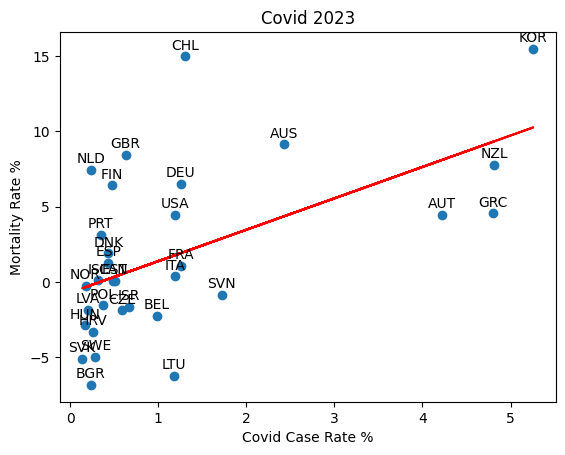

P-value: 0.0010991396394097153
R-squared Value: 0.30293114717801883


In [ ]:
X = covid['case_rate']
y = mortality_rate_23['Mortality Rate']
labels = covid['iso_code']
title = 'Covid 2023'
x_label = 'Covid Case Rate %'

model, y_pred, r2, p = linear_regression(X, y, labels=labels, plt_title=title, x_label=x_label)

print("P-value:", p)
print("R-squared Value:", r2)

#### **Covid 2020-2022 vs Mortality**

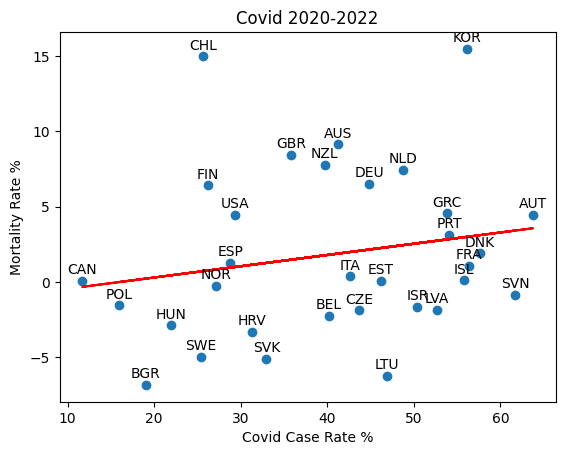

P-value: 0.2951719955612506
R-squared Value: 0.03645993073108489


In [ ]:
X = long_covid['case_rate']
y = mortality_rate_23['Mortality Rate']
labels = long_covid['iso_code']
title = 'Covid 2020-2022'
x_label = 'Covid Case Rate %'

model, y_pred, r2, p = linear_regression(X, y, labels=labels, plt_title=title, x_label=x_label)

print("P-value:", p)
print("R-squared Value:", r2)

#### **Total Vaccinations vs Mortality**

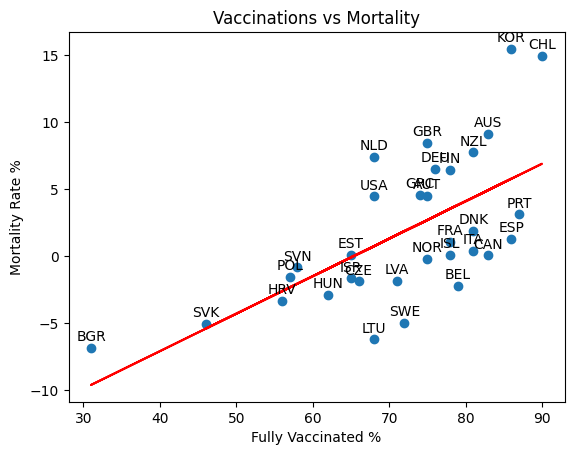

P-value: 9.516843430203183e-05
R-squared Value: 0.4029951615274442


In [ ]:
X = vaccinations['vaccinated_percentage']
y = mortality_rate_23['Mortality Rate']
labels = vaccinations['iso_code']
title = 'Vaccinations vs Mortality'
x_label = 'Fully Vaccinated %'

model, y_pred, r2, p = linear_regression(X, y, labels=labels, plt_title=title, x_label=x_label)

print("P-value:", p)
print("R-squared Value:", r2)

#### **Lockdown 2020-2022 vs Stringency**

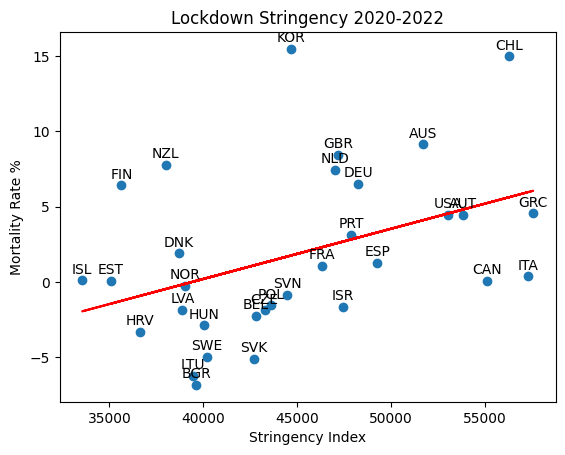

P-value: 0.020076482475662006
R-squared Value: 0.16736056227634188


In [ ]:
X = lockdown_stringency['stringency_index']
y = mortality_rate_23['Mortality Rate']
labels = lockdown_stringency['iso_code']
title = 'Lockdown Stringency 2020-2022'
x_label = 'Stringency Index'

model, y_pred, r2, p = linear_regression(X, y, labels=labels, plt_title=title, x_label=x_label)

print("P-value:", p)
print("R-squared Value:", r2)

#### **Aggreate Mortality and Covid Cases**

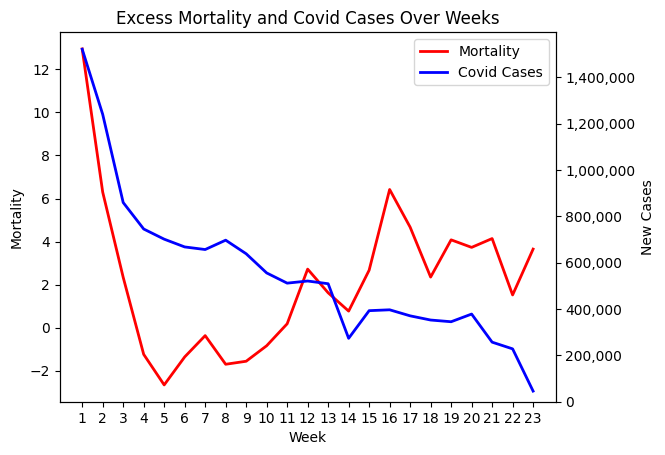

In [ ]:
x = aggregate_mortality_cases['Week number']
y = aggregate_mortality_cases['Mortality Rate']
z = aggregate_mortality_cases['new_cases']

# Create figure and axes
fig, ax1 = plt.subplots()

# Scatter plot for mortality
# ax1.scatter(x, y, color='blue', label='Mortality')
ax1.set_xlabel('Week')
ax1.set_ylabel('Mortality')
ax1.tick_params(axis='y')

# Create a twin Axes sharing the xaxis
ax2 = ax1.twinx()

# Scatter plot for new cases
# ax2.scatter(x, z, color='green', label='New Cases')
ax2.set_ylabel('New Cases')
ax2.tick_params(axis='y')

# Adding a continuous line to each scatter plot
ax1.plot(x, y, color='red', linestyle='-', linewidth=2, label='Mortality')
ax2.plot(x, z, color='blue', linestyle='-', linewidth=2, label='Covid Cases')

# Adding xticks
plt.xticks(x, x)

# Format y-axis of the second plot (new cases)
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax2.set_ylim(bottom=0)

# Adding a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Display the plot
plt.title('Excess Mortality and Covid Cases Over Weeks')
plt.show()

#### **Covid Temporal Analysis**

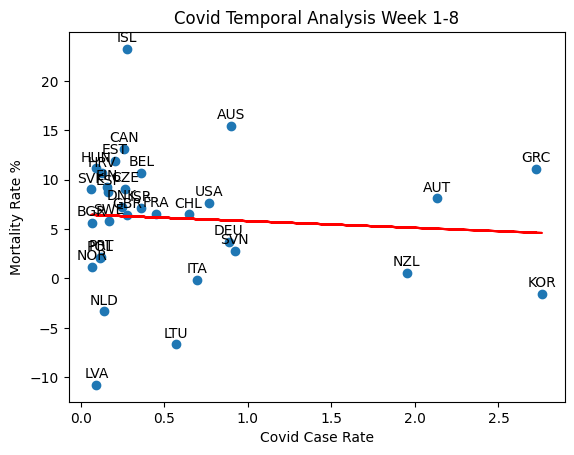

P-value: 0.6740177566186992
R-squared Value: 0.005979049674553205


In [ ]:
X = covid_week_1_8['case_rate']
# y = mortality_rate['Average Mortality Rate']
y = covid_week_1_8['Mortality Rate']
labels = covid_week_1_8['iso_code']
title = 'Covid Temporal Analysis Week 1-8'
x_label = 'Covid Case Rate'

model, y_pred, r2, p = linear_regression(X, y, labels=labels, plt_title=title, x_label=x_label)

print("P-value:", p)
print("R-squared Value:", r2)

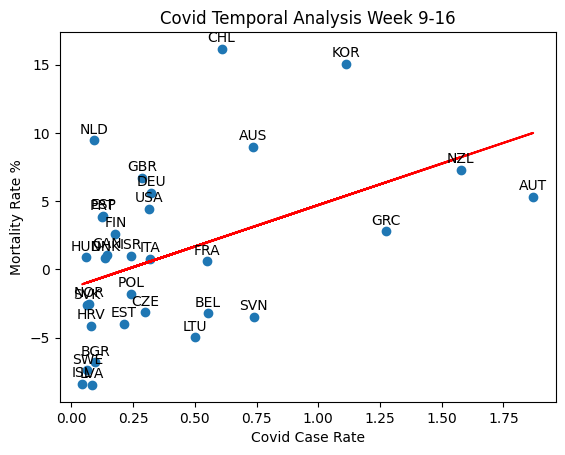

P-value: 0.009665308774431268
R-squared Value: 0.202970122350289


In [ ]:
X = covid_week_8_16['case_rate']
# y = mortality_rate['Average Mortality Rate']
y = covid_week_8_16['Mortality Rate']
labels = covid_week_8_16['iso_code']
title = 'Covid Temporal Analysis Week 9-16'
x_label = 'Covid Case Rate'

model, y_pred, r2, p = linear_regression(X, y, labels=labels, plt_title=title, x_label=x_label)

print("P-value:", p)
print("R-squared Value:", r2)

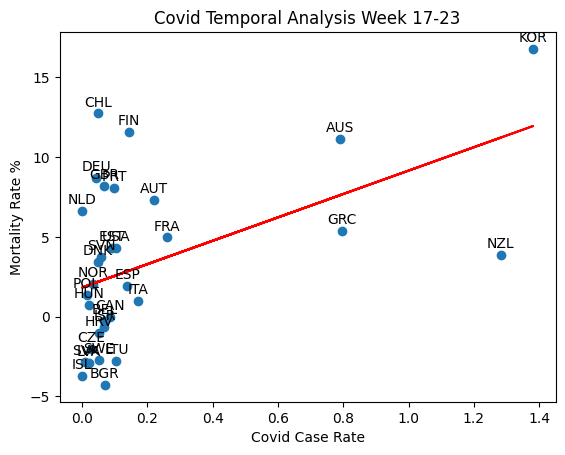

P-value: 0.005000295714583798
R-squared Value: 0.2342941352499115


In [ ]:
X = covid_week_16_23['case_rate']
y = covid_week_16_23['Mortality Rate']
labels = covid_week_16_23['iso_code']
title = 'Covid Temporal Analysis Week 17-23'
x_label = 'Covid Case Rate'

model, y_pred, r2, p = linear_regression(X, y, labels=labels, plt_title=title, x_label=x_label)

print("P-value:", p)
print("R-squared Value:", r2)

#### **Vaccine Temporal Analysis**

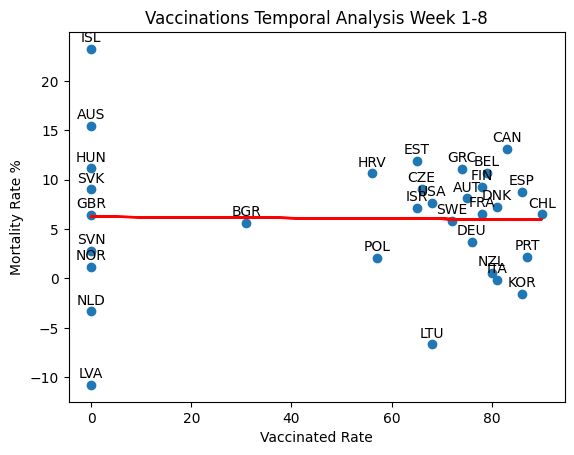

P-value: 0.9263557906488282
R-squared Value: 0.0002895247963350389


In [ ]:
X = vaccine_week_1_8['vaccinated_percentage']
y = vaccine_week_1_8['Mortality Rate']
labels = vaccine_week_1_8['iso_code']
title = 'Vaccinations Temporal Analysis Week 1-8'
x_label = 'Vaccinated Rate'

model, y_pred, r2, p = linear_regression(X, y, labels=labels, plt_title=title, x_label=x_label)

print("P-value:", p)
print("R-squared Value:", r2)

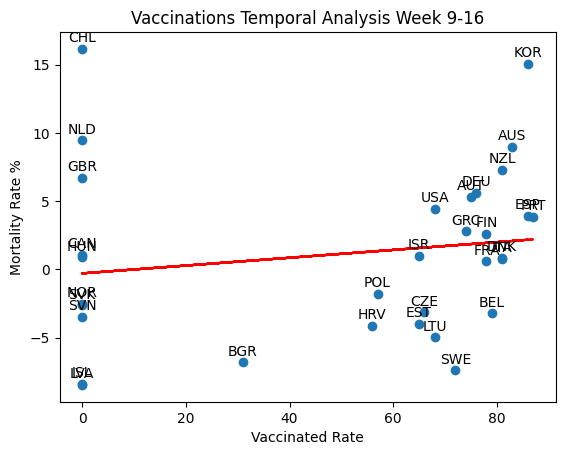

P-value: 0.3675680271377647
R-squared Value: 0.027140874427998174


In [ ]:
X = vaccine_week_9_16['vaccinated_percentage']
y = vaccine_week_9_16['Mortality Rate']
labels = vaccine_week_9_16['iso_code']
title = 'Vaccinations Temporal Analysis Week 9-16'
x_label = 'Vaccinated Rate'

model, y_pred, r2, p = linear_regression(X, y, labels=labels, plt_title=title, x_label=x_label)

print("P-value:", p)
print("R-squared Value:", r2)

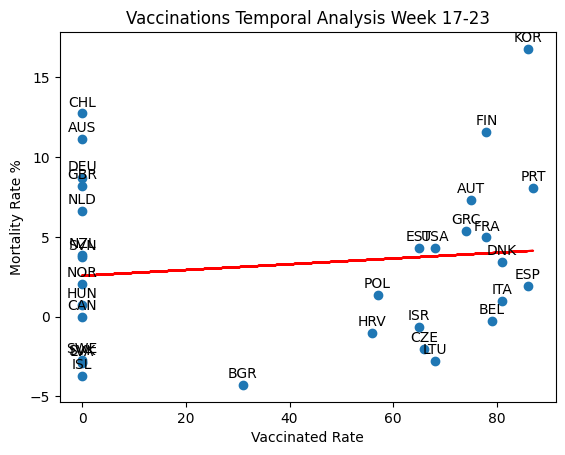

P-value: 0.49009012155111886
R-squared Value: 0.016014423752071183


In [ ]:
X = vaccine_week_17_23['vaccinated_percentage']
y = vaccine_week_17_23['Mortality Rate']
labels = vaccine_week_17_23['iso_code']
title = 'Vaccinations Temporal Analysis Week 17-23'
x_label = 'Vaccinated Rate'

model, y_pred, r2, p = linear_regression(X, y, labels=labels, plt_title=title, x_label=x_label)

print("P-value:", p)
print("R-squared Value:", r2)